In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataframe = pd.read_csv("datasets/euro-daily-hist.csv")

dataframe.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,...,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597


In [22]:
dataframe = dataframe.iloc[:, [0, 1, 4, -2]]
dataframe.columns = ["Date", "AUD", "CAD", "USD"]

dataframe.head()

,Date,AUD,CAD,USD
0,2023-01-27,1.5289,1.4479,1.0865
1,2023-01-26,1.5308,1.4568,1.0895
2,2023-01-25,1.5360,1.4544,1.0878
3,2023-01-24,1.5470,1.4517,1.0858
4,2023-01-23,1.5529,1.4523,1.0871


In [23]:
dataframe = pd.melt(dataframe, id_vars="Date", value_vars=["AUD", "CAD", "USD"], var_name="Currency", value_name="Euro Rate")

dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe["Euro Rate"] = pd.to_numeric(dataframe["Euro Rate"], errors="coerce")

dataframe = dataframe[dataframe["Date"] > "2022-12-31"].reset_index(drop=True)

dataframe

,Date,Currency,Euro Rate
0,2023-01-27,AUD,1.5289
1,2023-01-26,AUD,1.5308
2,2023-01-25,AUD,1.5360
3,2023-01-24,AUD,1.5470
4,2023-01-23,AUD,1.5529
5,2023-01-20,AUD,1.5619
6,2023-01-19,AUD,1.5726
7,2023-01-18,AUD,1.5413
8,2023-01-17,AUD,1.5611
9,2023-01-16,AUD,1.5537


<Axes: xlabel='Date', ylabel='Euro Rate'>

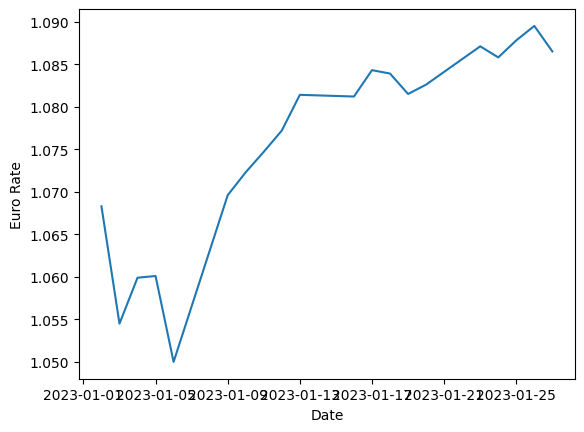

In [38]:
usd = dataframe[dataframe["Currency"] == "USD"].reset_index(drop=True)
sns.lineplot(x = "Date", y = "Euro Rate", data = usd)

<Axes: xlabel='Date', ylabel='Euro Rate'>

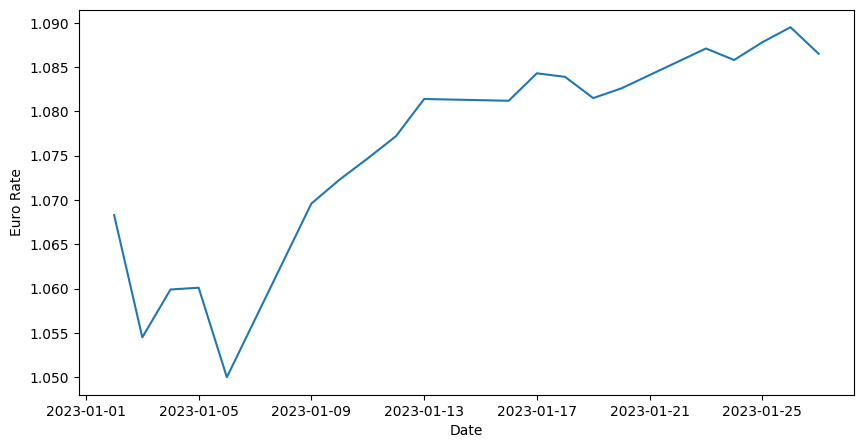

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = usd)

[Text(0.5, 1.0, 'Euro - USD'), Text(0.5, 0, 'Date'), Text(0, 0.5, 'Euro')]

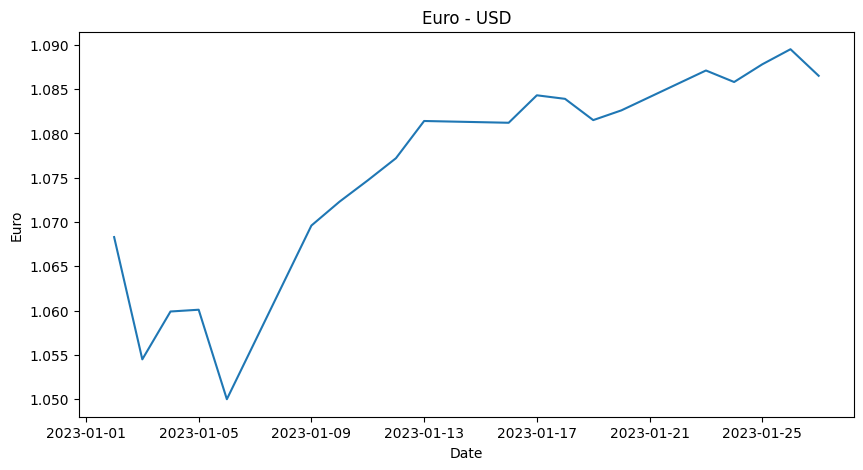

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = usd).set(title = "Euro - USD", xlabel = "Date", ylabel = "Euro")

[Text(0.5, 1.0, 'Euro - USD'), Text(0.5, 0, 'Date'), Text(0, 0.5, 'Euro')]

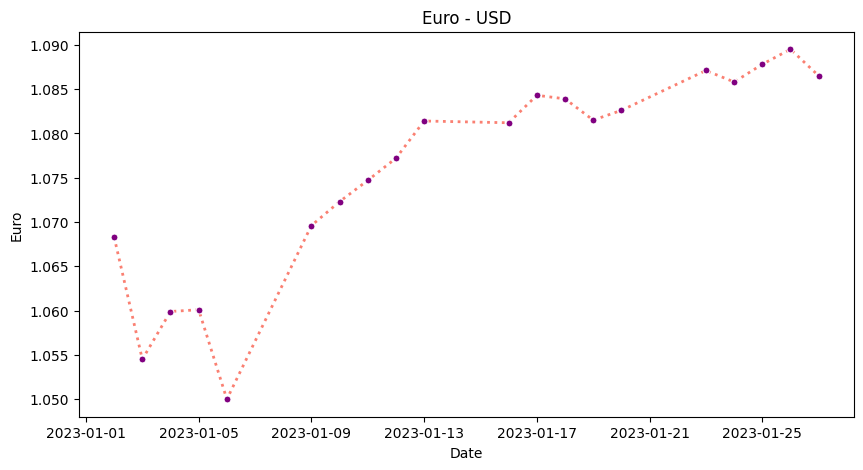

In [27]:
plt.figure(figsize=(10, 5))
sns.lineplot(
  x = "Date", y = "Euro Rate", data = usd,
  linestyle = "dotted", linewidth = 2, color = "salmon",
  marker = ".", markerfacecolor = "purple", markersize = 10
).set(title = "Euro - USD", xlabel = "Date", ylabel = "Euro")

<Axes: xlabel='Date', ylabel='Euro Rate'>

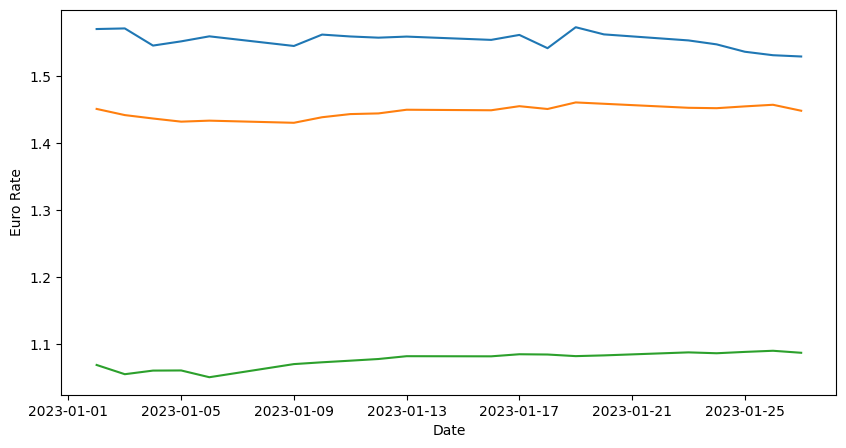

In [28]:
aud = dataframe[dataframe["Currency"] == "AUD"].reset_index(drop=True)
cad = dataframe[dataframe["Currency"] == "CAD"].reset_index(drop=True)
usd = dataframe[dataframe["Currency"] == "USD"].reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = aud)
sns.lineplot(x = "Date", y = "Euro Rate", data = cad)
sns.lineplot(x = "Date", y = "Euro Rate", data = usd)

<Axes: xlabel='Date', ylabel='Euro Rate'>

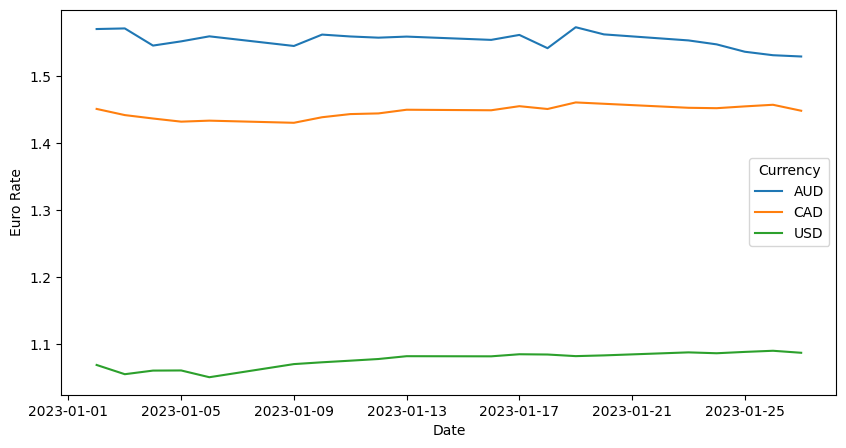

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = dataframe, hue = "Currency")

<Axes: xlabel='Date', ylabel='Euro Rate'>

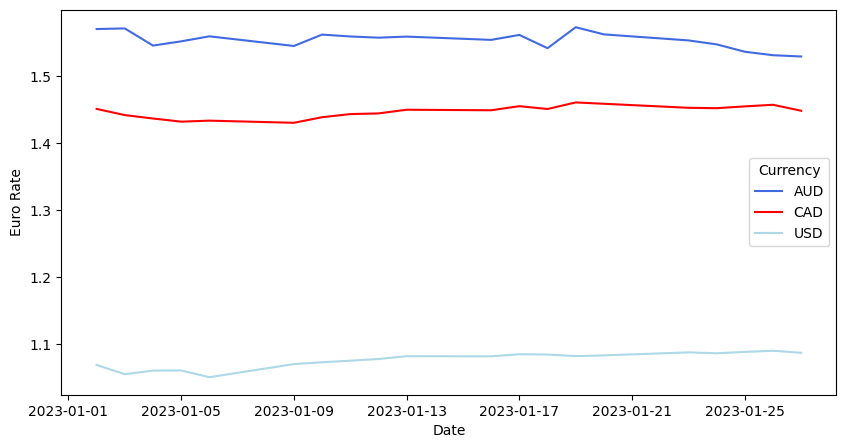

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = dataframe, hue = "Currency", palette = ["royalblue", "red", "lightblue"])

<Axes: xlabel='Date', ylabel='Euro Rate'>

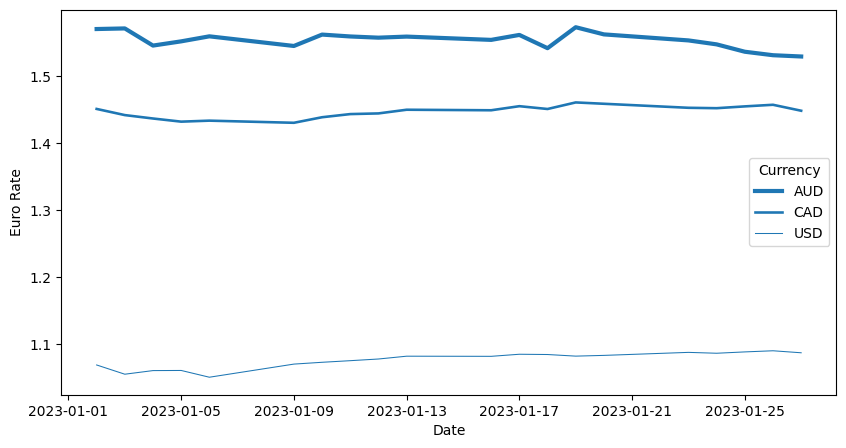

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = dataframe, size = "Currency")

<Axes: xlabel='Date', ylabel='Euro Rate'>

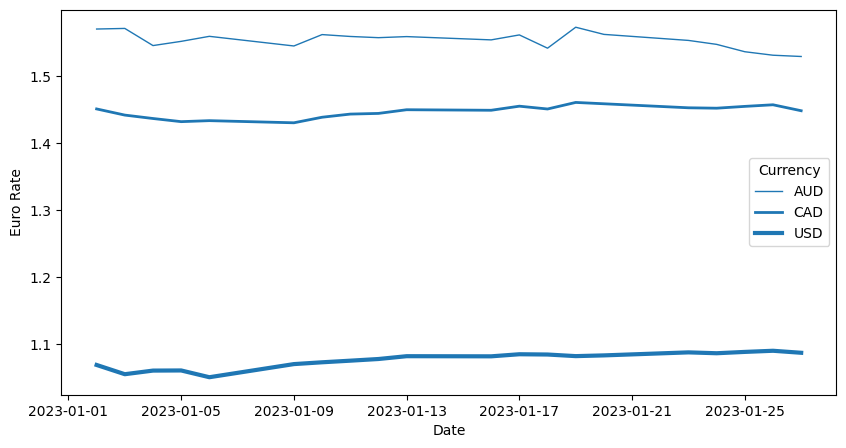

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = dataframe, size = "Currency", sizes = [1, 2, 3])

<Axes: xlabel='Date', ylabel='Euro Rate'>

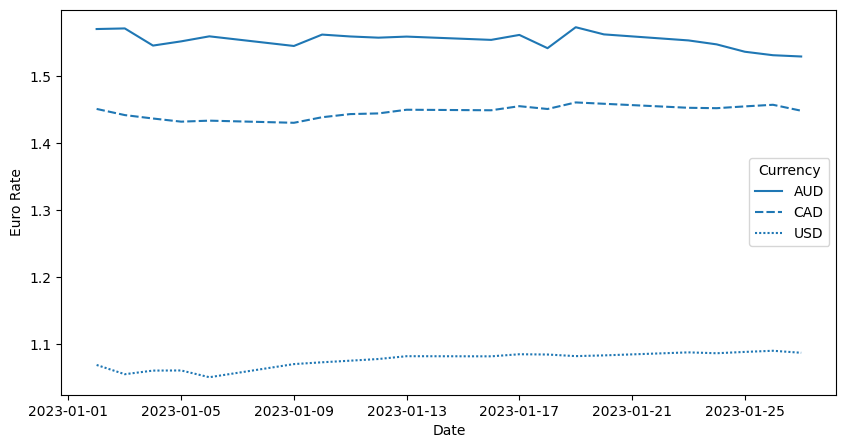

In [33]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Euro Rate", data = dataframe, style = "Currency")